Cleaning and Preparing Healthcare Data for Analysis
Objective:
To clean a real-world healthcare dataset by handling inconsistencies, duplicates, and missing values.
Instructions:
Load the Dataset:
Read the healthcare dataset into a Pandas DataFrame.
Handle Missing Data:
Identify missing values in patient demographics (age, gender, blood pressure, etc.).
Apply appropriate imputation methods.
Detect and Handle Duplicates:
Identify duplicate records using duplicated().
Remove or merge duplicates as necessary.
Detect and Handle Outliers:
Use boxplots to identify extreme values.
Apply transformations or capping techniques to handle outliers.
Standardize and Normalize Data:
Convert categorical variables into numerical representations.
Scale numerical variables using Min-Max Scaling or Standard Scaling.
Data Validation:
Ensure no missing values or duplicates remain.
Check data types and correct inconsistencies.
Final Data Export:
Save the cleaned dataset as a CSV file for further analysis.

Original Columns: Index(['Patient_ID', 'Age', 'Gender', 'Blood_Pressure', 'Cholesterol',
       'Diabetes', 'Heart_Disease'],
      dtype='object')
Columns after stripping spaces (if any): Index(['Patient_ID', 'Age', 'Gender', 'Blood_Pressure', 'Cholesterol',
       'Diabetes', 'Heart_Disease'],
      dtype='object')
   Patient_ID  Age  Gender  Blood_Pressure  Cholesterol Diabetes Heart_Disease
0           1   69    Male            95.0        122.0       No            No
1           2   32    Male           129.0        191.0       No            No
2           3   89  Female           101.0        214.0       No            No
3           4   78  Female           142.0        203.0       No            No
4           5   38    Male           160.0        217.0       No            No

Initial missing values:
 Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Missing values after

C:\Users\dhari\AppData\Local\Temp\ipykernel_16188\3109026614.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


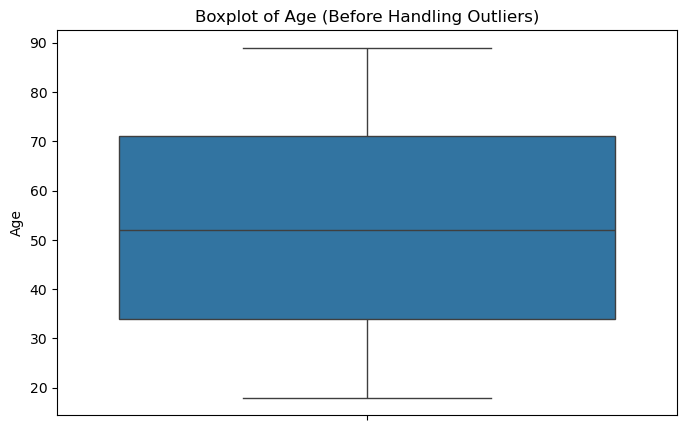

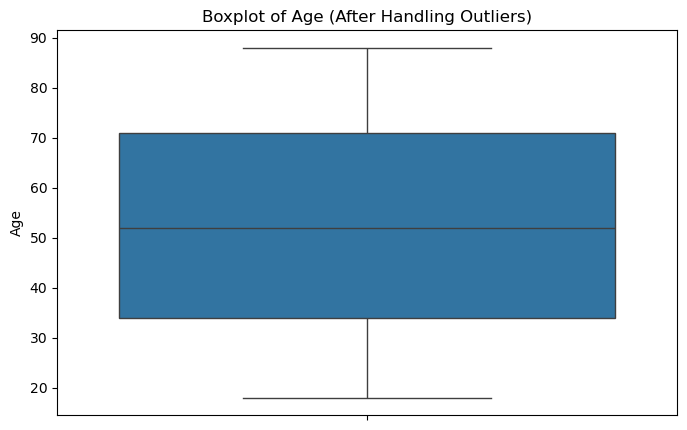


Final missing values:
 Patient_ID         0
Age                0
Gender            21
Blood_Pressure    30
Cholesterol       20
Diabetes           0
Heart_Disease      0
dtype: int64

Final number of duplicate rows: 0

Data types:
 Patient_ID          int64
Age               float64
Gender             object
Blood_Pressure    float64
Cholesterol       float64
Diabetes           object
Heart_Disease      object
dtype: object

Cleaned data saved to cleaned_healthcare_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

try:
    df = pd.read_csv('healthcare_dataset.csv')  # Replace with your actual file path
except FileNotFoundError:
    print("Error: healthcare_dataset.csv not found. Please provide the correct file path.")
    exit()

print("Original Columns:", df.columns)

# No need to rename if the column is already 'Age' (but good to check for spaces):
df.rename(columns={col: col.strip() for col in df.columns}, inplace=True)  # Strip spaces from all columns

print("Columns after stripping spaces (if any):", df.columns)

print(df.head()) # Check data is loaded correctly

# 2. Handle Missing Data
print("\nInitial missing values:\n", df.isnull().sum())

# Imputation (using median for 'Age' and other numerical, mode for categorical)
for col in ['Age', 'blood_pressure', 'cholesterol']:  # Add other numerical columns
    if col in df.columns:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        print(f"Warning: Column '{col}' not found for imputation.")

for col in ['gender', 'medical_condition']: # Add other categorical columns
    if col in df.columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        print(f"Warning: Column '{col}' not found for imputation.")


print("\nMissing values after imputation:\n", df.isnull().sum())

# 3. Detect and Handle Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", df.duplicated().sum())

# 4. Detect and Handle Outliers (Example for 'Age' and 'blood_pressure')

for col in ['Age', 'blood_pressure']:
    if col in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col} (Before Handling Outliers)')
        plt.show()

        upper_limit = df[col].quantile(0.99) # Example: 99th percentile capping
        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

        plt.figure(figsize=(8, 5))
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col} (After Handling Outliers)')
        plt.show()
    else:
        print(f"Warning: Column '{col}' not found for outlier handling.")



# 5. Standardize and Normalize Data

# a. Convert Categorical to Numerical (One-Hot Encoding)
if 'gender' in df.columns and 'medical_condition' in df.columns:
    df = pd.get_dummies(df, columns=['gender', 'medical_condition'], drop_first=True)  # Add other categorical columns
else:
    print("Warning: 'gender' or 'medical_condition' column not found for one-hot encoding.")

# b. Scale Numerical Variables (Min-Max Scaling)
numerical_cols = ['Age', 'blood_pressure', 'cholesterol']  # Add all numerical column names
numerical_cols = [col for col in numerical_cols if col in df.columns] # Only scale if column exists
scaler = MinMaxScaler()  # Or StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 6. Data Validation
print("\nFinal missing values:\n", df.isnull().sum())
print("\nFinal number of duplicate rows:", df.duplicated().sum())
print("\nData types:\n", df.dtypes)

# 7. Final Data Export
df.to_csv('cleaned_healthcare_data.csv', index=False)
print("\nCleaned data saved to cleaned_healthcare_data.csv")